## metryk w przestrzeni napisów

In [1]:
#Kod przekopiowany z ćwiczeń

import numpy as np
from sortedcontainers import SortedSet

def preprocess(text: str) -> str:
    text = text.lower()
    marks = ['.', ';', ':']
    for mark in marks:
        text = text.translate({ord(mark):None})
    # Your code here:
    # Convert the text to lowercase.
    # Remove all punctuation marks;
    return text

def text_to_vec(docs: list[str]) -> list[list[int]]:
    # Your code here:
    # Convert documents to numerical vectors.
    # Preprocess documents with the preprocess() function.
    # Represent documents as vectors of word frequencies, 
    # you will need to extract a vocabulary from all the documents.
    alphabet = SortedSet()
    sentences = []

    for doc in docs:
        sentences.append([])
        sentences[-1] = preprocess(doc).split()
        alphabet.update(sentences[-1])
    
    freq_vecs = []    
    n = len(alphabet)
    
    for sentence in sentences:
        freq_vecs.append([0] * n)
        for word in sentence:
            freq_vecs[-1][alphabet.index(word)] += 1

    return freq_vecs

def cosine_similarity(text_a: str, text_b: str) -> float:
    cosine_similarity = 0
    vec_a, vec_b = text_to_vec([text_a, text_b])
    vec_a, vec_b = np.array(vec_a), np.array(vec_b)
    
    cosine_similarity = vec_a.dot(vec_b)/(np.linalg.norm(vec_a)*np.linalg.norm(vec_b))
    return cosine_similarity

def dice(text_a: str, text_b: str) -> float:
    dice = 0
    set_A = set(preprocess(text_a).split())
    set_B = set(preprocess(text_b).split())
    dice = 2*len(set_A.intersection(set_B)) / (len(set_A) + len(set_B))
    return dice

def euclidean_distance(text_a: str, text_b: str) -> float:
    dist = 0
    vec_a, vec_b = text_to_vec([text_a, text_b])
    vec_a, vec_b = np.array(vec_a), np.array(vec_b)

    dist = np.linalg.norm(vec_a - vec_b)
    
    return dist

Matplotlib is building the font cache; this may take a moment.
/home/ciastek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1. 2.]
 [4. 2.]]


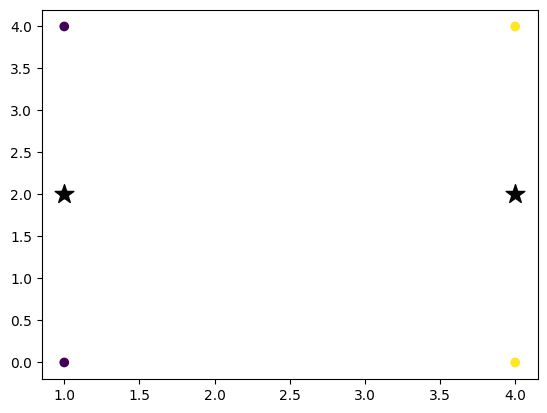

In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


# Załadowanie danych
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# Utworzenie obiektu k-means z 2 klastrami
kmeans = KMeans(n_clusters=2, random_state=0)

# Dopasowanie modelu do danych
kmeans.fit(X)

# Pobranie środków masy klastrów
centroids = kmeans.cluster_centers_

# Wyświetlenie środków masy klastrów
print(centroids)

# Przypisanie klastrów do punktów
labels = kmeans.predict(X)

# Wizualizacja klastrów
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.show()

 ## indeks Daviesa-Bouldina

In [4]:
def dbi(data, cluster_classification, cluster_center, distance_func):
    #ilość klastrów
    k = len(cluster_center)
    
    #średnia odległość punktów w klastrze od ośrodka ciężkości odpowiadającego klastra
    sigma = np.zeros(k)
    for i in range(k):
        sigma[i] = np.mean([distance_func(data[j], cluster_center[i]) for j in np.where(cluster_classification == i)[0]])

    # obliczanie odległości od siebie klastrów
    R = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            if i != j:
                R[i][j] = (sigma[i] + sigma[j]) / distance_func(cluster_center[i], cluster_center[j])

    # obliczanie indewksu dbi
    dbi = 0
    for i in range(k):
        dbi += np.max([R[i][j] for j in range(k) if j != i])
    
    return dbi / k